In [1]:
import pandas as pd
iris = pd.read_csv(r'C:\Users\usrer\ML-task\datasets\iris\iris.csv')

In [2]:
dir(iris)

['Column1',
 'Column2',
 'Column3',
 'Column4',
 'Column5',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__

In [3]:
iris.columns

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5'], dtype='object')

In [4]:
iris.head()

,Column1,Column2,Column3,Column4,Column5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.head()

,Column1,Column2,Column3,Column4,Column5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
print(iris['Column5'].unique()) 

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
iris[iris.Column5=='Iris-virginica'].head()

,Column1,Column2,Column3,Column4,Column5
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [12]:
from matplotlib import pyplot as plt

In [13]:
%matplotlib inline

In [15]:
iris0=iris[iris.Column5=='Iris-setosa']
iris1=iris[iris.Column5=='Iris-versicolor']
iris2=iris[iris.Column5=='Iris-virginica']

In [18]:
iris2.head()

,Column1,Column2,Column3,Column4,Column5
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


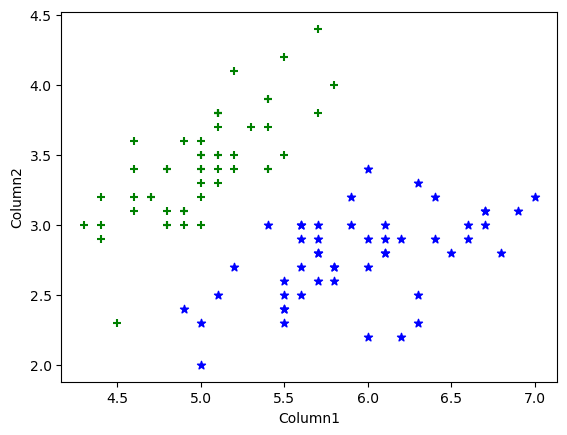

In [22]:
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.scatter(iris0['Column1'],iris0['Column2'],color="green",marker="+")
plt.scatter(iris1['Column1'],iris1['Column2'],color="blue",marker="*")

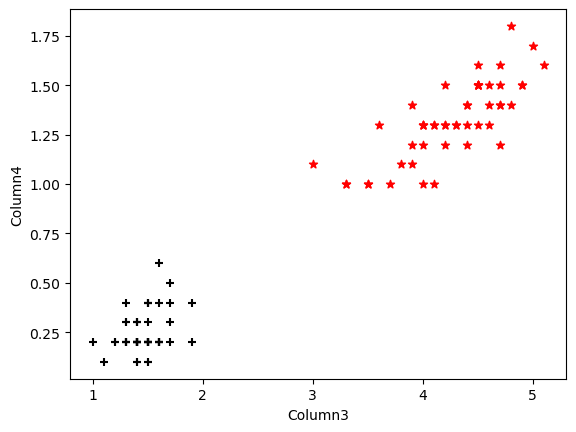

In [25]:
plt.xlabel('Column3')
plt.ylabel('Column4')
plt.scatter(iris0['Column3'], iris0['Column4'], color="black", marker="+")  
plt.scatter(iris1['Column3'], iris1['Column4'], color="red", marker="*")    

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
x=iris.drop(['Column5'],axis='columns')
x.head()

,Column1,Column2,Column3,Column4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y = iris['Column5'] 

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
print("Basic SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Basic SVM Model Performance:
Accuracy: 0.9777777777777777

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


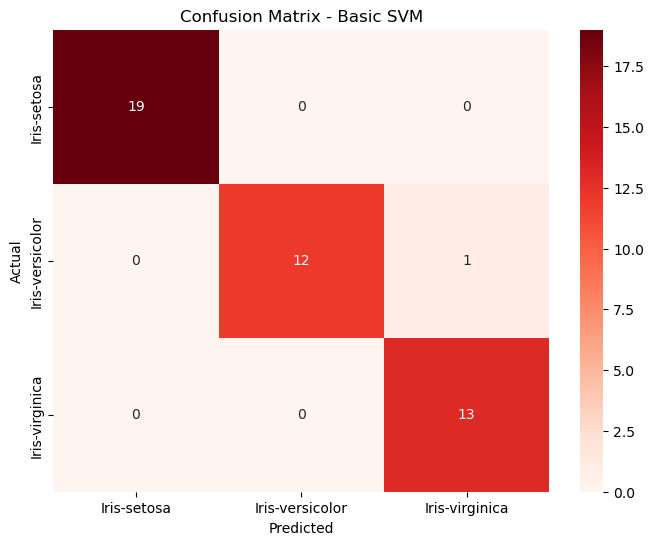

In [49]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=iris['Column5'].unique(), yticklabels=iris['Column5'].unique())
plt.title('Confusion Matrix - Basic SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=3, cv=5)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [52]:
print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [53]:
best_svm = grid_search.best_estimator_
y_pred_tuned = best_svm.predict(x_test)

In [54]:
print("\nTuned SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))


Tuned SVM Model Performance:
Accuracy: 0.9777777777777777

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


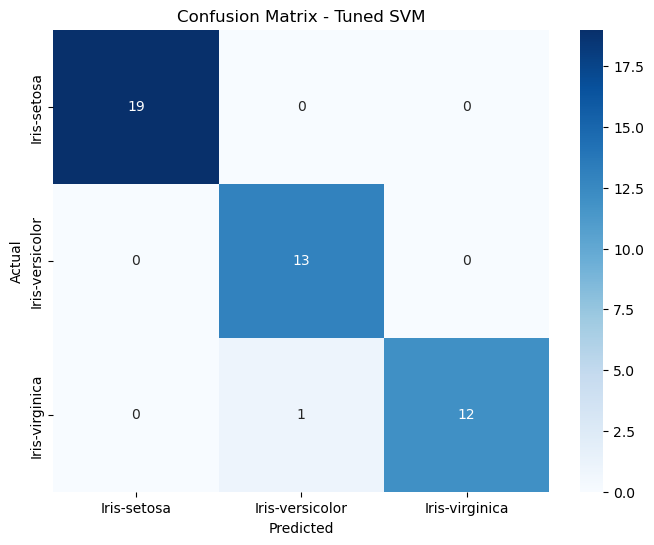

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues',
            xticklabels=iris['Column5'].unique(), yticklabels=iris['Column5'].unique())
plt.title('Confusion Matrix - Tuned SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
from sklearn.model_selection import cross_val_score
models = {
    'Basic SVM': SVC(kernel='linear', random_state=42),
    'Tuned SVM': best_svm,
    'RBF Kernel SVM': SVC(kernel='rbf', random_state=42),
    'Polynomial Kernel SVM': SVC(kernel='poly', degree=3, random_state=42)
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    results[name] = cv_scores.mean()

print("\nCross-validation Results:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")


Cross-validation Results:
Basic SVM: 0.9429
Tuned SVM: 0.9619
RBF Kernel SVM: 0.9429
Polynomial Kernel SVM: 0.8762


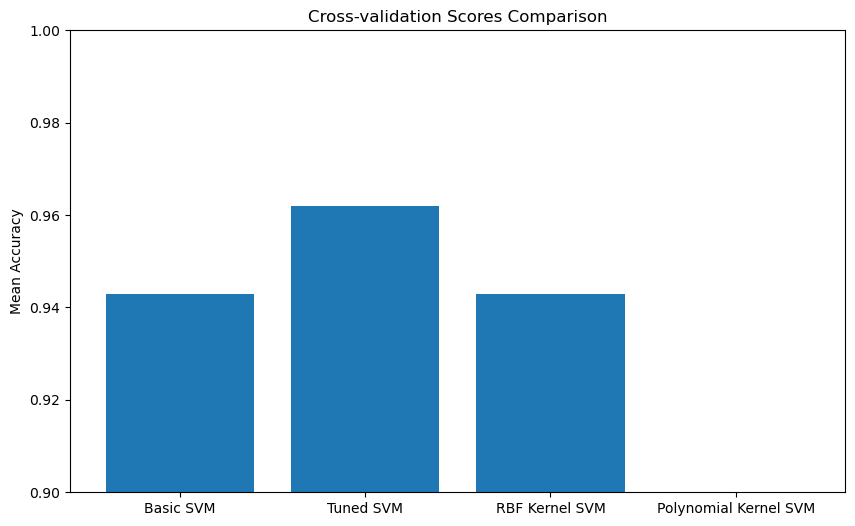

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Cross-validation Scores Comparison')
plt.ylabel('Mean Accuracy')
plt.ylim(0.9, 1.0)
plt.show()